# Dot Follow Reinforcement Learning

Train a fish agent to follow a moving target around the tank. This notebook demonstrates how the fish learns to track different movement patterns including circular, figure-8, random walk, zigzag, and spiral patterns.

## Key Features
- **Moving Target**: The fish must learn to follow a target that moves in various patterns
- **Dynamic Learning**: Real-time visualization of learning progress
- **Multiple Patterns**: Switch between different target movement patterns during training
- **Enhanced Observation Space**: Fish observes its own position, velocity, and target position
- **Reward Shaping**: Rewards based on proximity to moving target with bonuses for close following

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append('../')

from dot_follow_environment import DotFollowEnv, MovingTarget
from dot_follow_trainer import DotFollowLearner
from dot_follow_visualization import run_dot_follow_training, test_dot_follow_model, compare_movement_patterns

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("Dot Follow RL Environment Ready!")
print("Available movement patterns: circular, figure8, random_walk, zigzag, spiral")

Dot Follow RL Environment Ready!
Available movement patterns: circular, figure8, random_walk, zigzag, spiral


## 1. Environment Overview

Let's first explore the different movement patterns available for the target.

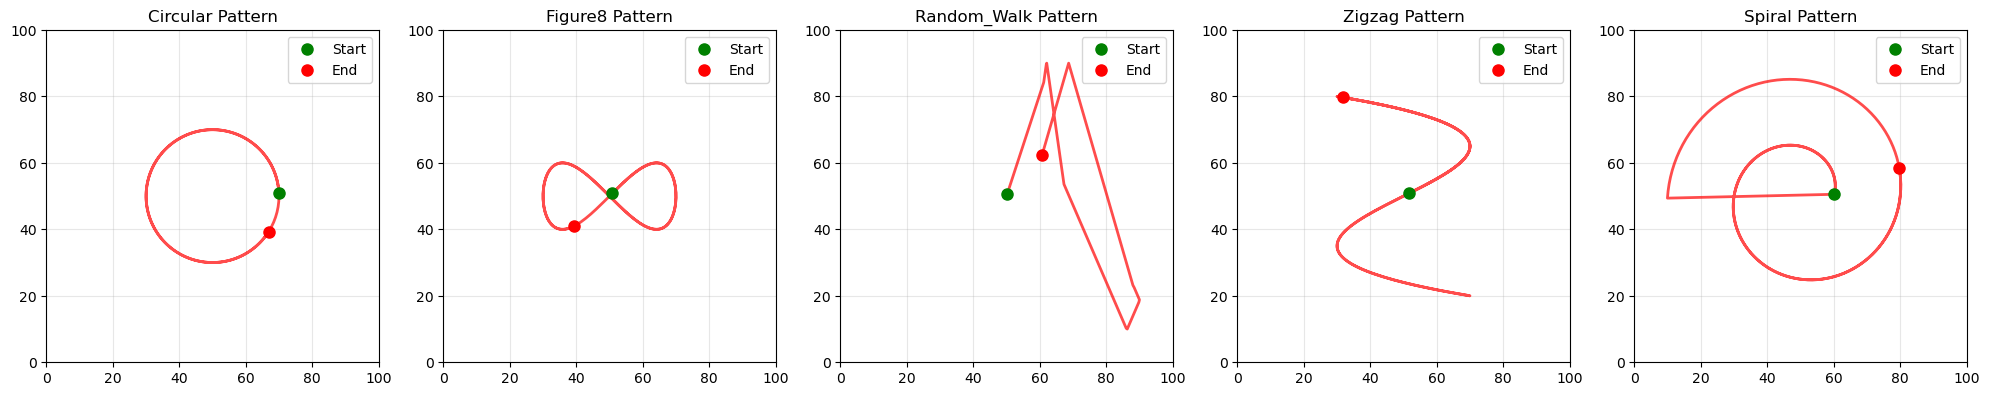

Target movement patterns demonstrated above.
The fish will learn to follow these moving targets!


In [2]:
# Demonstrate different movement patterns
patterns = ['circular', 'figure8', 'random_walk', 'zigzag', 'spiral']

fig, axes = plt.subplots(1, len(patterns), figsize=(20, 4))

for idx, pattern in enumerate(patterns):
    # Create environment with this pattern
    env = DotFollowEnv(pattern)
    
    # Simulate target movement for visualization
    target_positions = []
    for _ in range(300):  # Simulate 300 steps
        env.target.step()
        target_positions.append(env.target.position.copy())
    
    target_positions = np.array(target_positions)
    
    ax = axes[idx]
    ax.plot(target_positions[:, 0], target_positions[:, 1], 'r-', alpha=0.7, linewidth=2)
    ax.plot(target_positions[0, 0], target_positions[0, 1], 'go', markersize=8, label='Start')
    ax.plot(target_positions[-1, 0], target_positions[-1, 1], 'ro', markersize=8, label='End')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')
    ax.set_title(f'{pattern.title()} Pattern')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

print("Target movement patterns demonstrated above.")
print("The fish will learn to follow these moving targets!")

## 2. Basic Environment Testing

Let's test the environment with random actions to see how it behaves.

In [3]:
# Test environment with random actions
env = DotFollowEnv('circular')
obs = env.reset()

print(f"Observation space dimension: {env.obs_dim}")
print(f"Action space dimension: {env.act_dim}")
print(f"Initial observation: {obs}")
print(f"Fish position: {env.position}")
print(f"Target position: {env.target.position}")

# Take a few random steps
total_reward = 0
for step in range(5):
    action = np.random.uniform(-1, 1, 2)  # Random action
    obs, reward, done, info = env.step(action)
    total_reward += reward
    
    print(f"Step {step+1}: Action={action}, Reward={reward:.3f}, Done={done}")
    print(f"  Fish pos: {env.position}, Target pos: {env.target.position}")
    print(f"  Distance to target: {np.linalg.norm(env.position - env.target.position):.2f}")

print(f"\nTotal reward over 5 steps: {total_reward:.3f}")

Observation space dimension: 6
Action space dimension: 2
Initial observation: [-0.13419609  0.17194586  0.          0.          0.          0.        ]
Fish position: [43.29019557 58.59729311]
Target position: [50. 50.]
Step 1: Action=[0.09123358 0.88292962], Reward=3.736, Done=False
  Fish pos: [43.29931893 58.68558607], Target pos: [69.984    50.799786]
  Distance to target: 27.83
Step 2: Action=[-0.36204874  0.68975062], Reward=3.960, Done=False
  Fish pos: [43.27223741 58.84285409], Target pos: [69.936035 51.598293]
  Distance to target: 27.63
Step 3: Action=[-0.95345613  0.62893697], Reward=3.970, Done=False
  Fish pos: [43.14981029 59.06301581], Target pos: [69.85617  52.394245]
  Distance to target: 27.53
Step 4: Action=[-0.43629045 -0.76367034], Reward=3.984, Done=False
  Fish pos: [42.98375411 59.2068105 ], Target pos: [69.744545 53.186363]
  Distance to target: 27.43
Step 5: Action=[0.39347433 0.25788569], Reward=4.004, Done=False
  Fish pos: [42.85704537 59.37639375], Target

## 3. Interactive Training with Visualization

Now let's train the fish with real-time visualization. You can change movement patterns during training using the buttons!

Starting interactive training...
- Watch the fish (blue) learn to follow the target (red)
- Use the buttons to change movement patterns during training
- Close the window when you're satisfied with the performance


/Users/avielstein/Desktop/reinforcement-learning/tank-sim/dot-follow/dot_follow_visualization.py:184: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(
/Users/avielstein/Desktop/reinforcement-learning/tank-sim/dot-follow/dot_follow_visualization.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


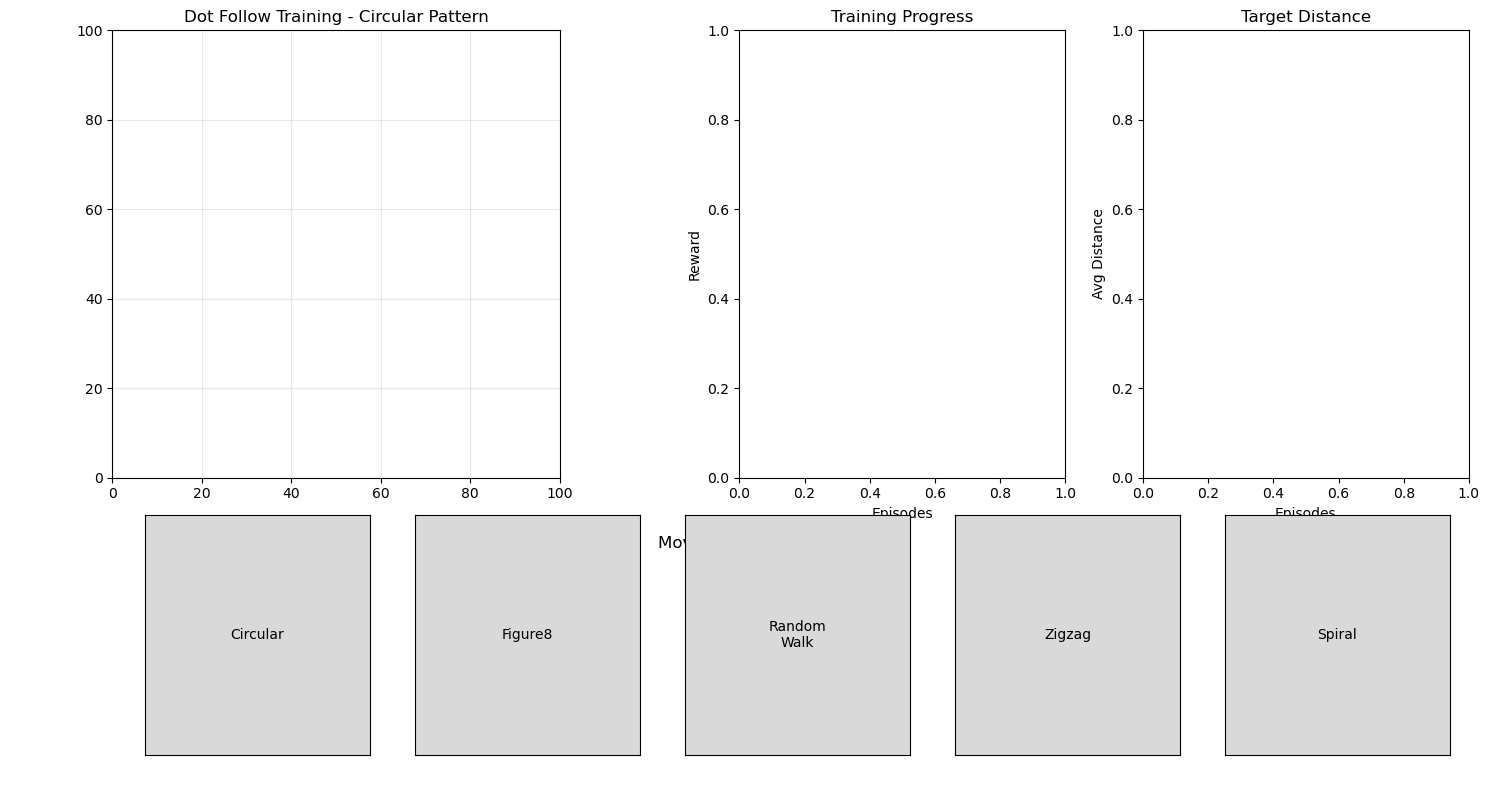

Best model saved as best_dot_follow_circular.pt! Mean return: 621.92
Training completed! Episodes trained: 1
Best average return: 621.92


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [4]:
# Start interactive training with visualization
# This will open a window with real-time training visualization
# Use the buttons at the bottom to change movement patterns during training
# Close the window to stop training and save the best model

print("Starting interactive training...")
print("- Watch the fish (blue) learn to follow the target (red)")
print("- Use the buttons to change movement patterns during training")
print("- Close the window when you're satisfied with the performance")

learner = run_dot_follow_training('circular')

print(f"Training completed! Episodes trained: {learner.episode_count}")
if learner.best_return > -np.inf:
    print(f"Best average return: {learner.best_return:.2f}")

## 4. Test Trained Model

Let's test how well the trained fish performs on different movement patterns.

Testing trained model on different movement patterns...
Changed movement pattern to: circular
Changed movement pattern to: figure8
Changed movement pattern to: random_walk


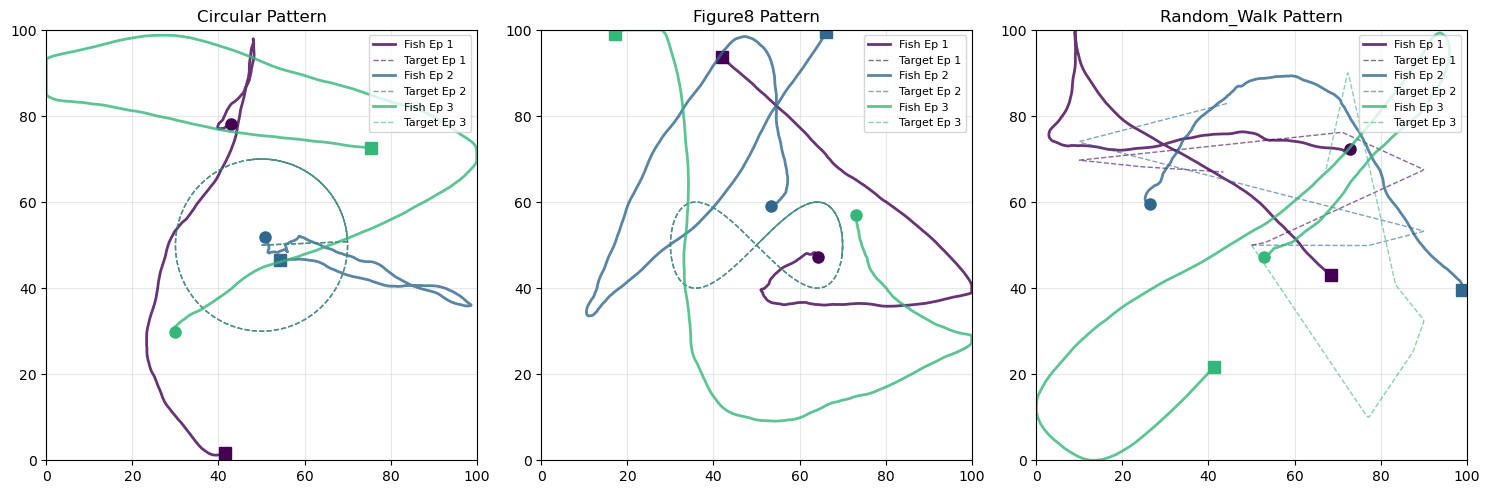

In [5]:
# Test the trained model on different patterns
if 'learner' in locals():
    print("Testing trained model on different movement patterns...")
    test_dot_follow_model(learner, num_episodes=3, movement_patterns=['circular', 'figure8', 'random_walk'])
else:
    print("No trained model available. Please run the training cell first.")

## 5. Quick Training Without Visualization

For faster training without the real-time visualization, you can train directly:

Training for 100 episodes...
Episode 0: Reward=663.03, Distance=37.38
Episode 10: Reward=579.55, Distance=42.80
Episode 20: Reward=581.58, Distance=42.11
Episode 30: Reward=577.04, Distance=41.86
Episode 40: Reward=568.55, Distance=42.04
Episode 50: Reward=566.80, Distance=42.13
Episode 60: Reward=575.03, Distance=41.70
Episode 70: Reward=589.31, Distance=41.31
Episode 80: Reward=592.20, Distance=41.05
Episode 90: Reward=613.23, Distance=40.25
Episode 100: Reward=616.45, Distance=40.07
Episode 110: Reward=615.91, Distance=39.98
Episode 120: Reward=621.08, Distance=39.80
Episode 130: Reward=643.36, Distance=38.95
Episode 140: Reward=671.76, Distance=37.82
Episode 150: Reward=690.08, Distance=37.01
Episode 160: Reward=695.90, Distance=36.67
Episode 170: Reward=705.14, Distance=36.22
Episode 180: Reward=710.95, Distance=35.88
Episode 190: Reward=716.81, Distance=35.60
Episode 200: Reward=724.60, Distance=35.28
Episode 210: Reward=735.89, Distance=34.67
Episode 220: Reward=744.74, Distance

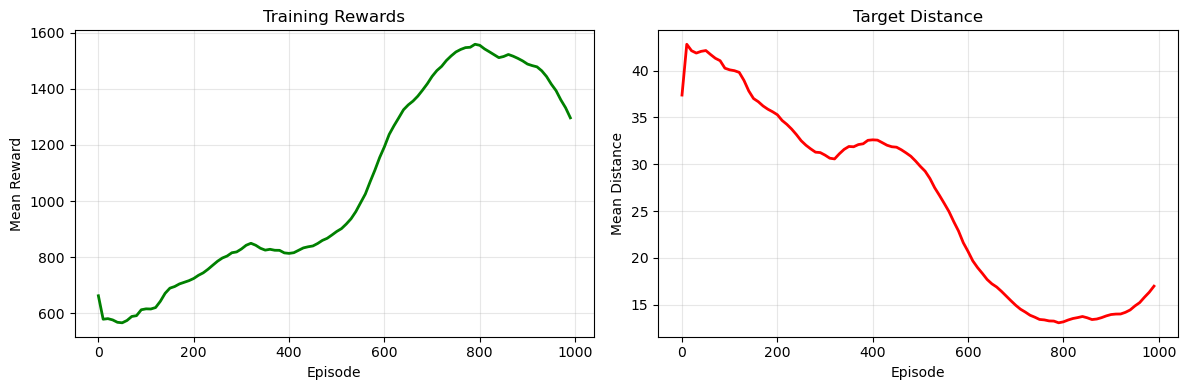

Quick training completed!


In [7]:
# Quick training without visualization
quick_learner = DotFollowLearner('circular')

print("Training for 100 episodes...")
rewards = []
distances = []

for episode in range(1000):
    quick_learner.train_step()
    
    if episode % 10 == 0:
        metrics = quick_learner.get_performance_metrics()
        if metrics:
            print(f"Episode {episode}: Reward={metrics['mean_reward']:.2f}, Distance={metrics['mean_target_distance']:.2f}")
            rewards.append(metrics['mean_reward'])
            distances.append(metrics['mean_target_distance'])

# Plot training progress
if rewards:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(range(0, len(rewards)*10, 10), rewards, 'g-', linewidth=2)
    ax1.set_title('Training Rewards')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Mean Reward')
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(range(0, len(distances)*10, 10), distances, 'r-', linewidth=2)
    ax2.set_title('Target Distance')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Mean Distance')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("Quick training completed!")

## 6. Compare Learning Across Movement Patterns

Let's see how the learning difficulty varies across different movement patterns.

Comparing learning performance across movement patterns...
This may take a few minutes...
Training on circular pattern...
Training on figure8 pattern...
Training on random_walk pattern...
Training on zigzag pattern...


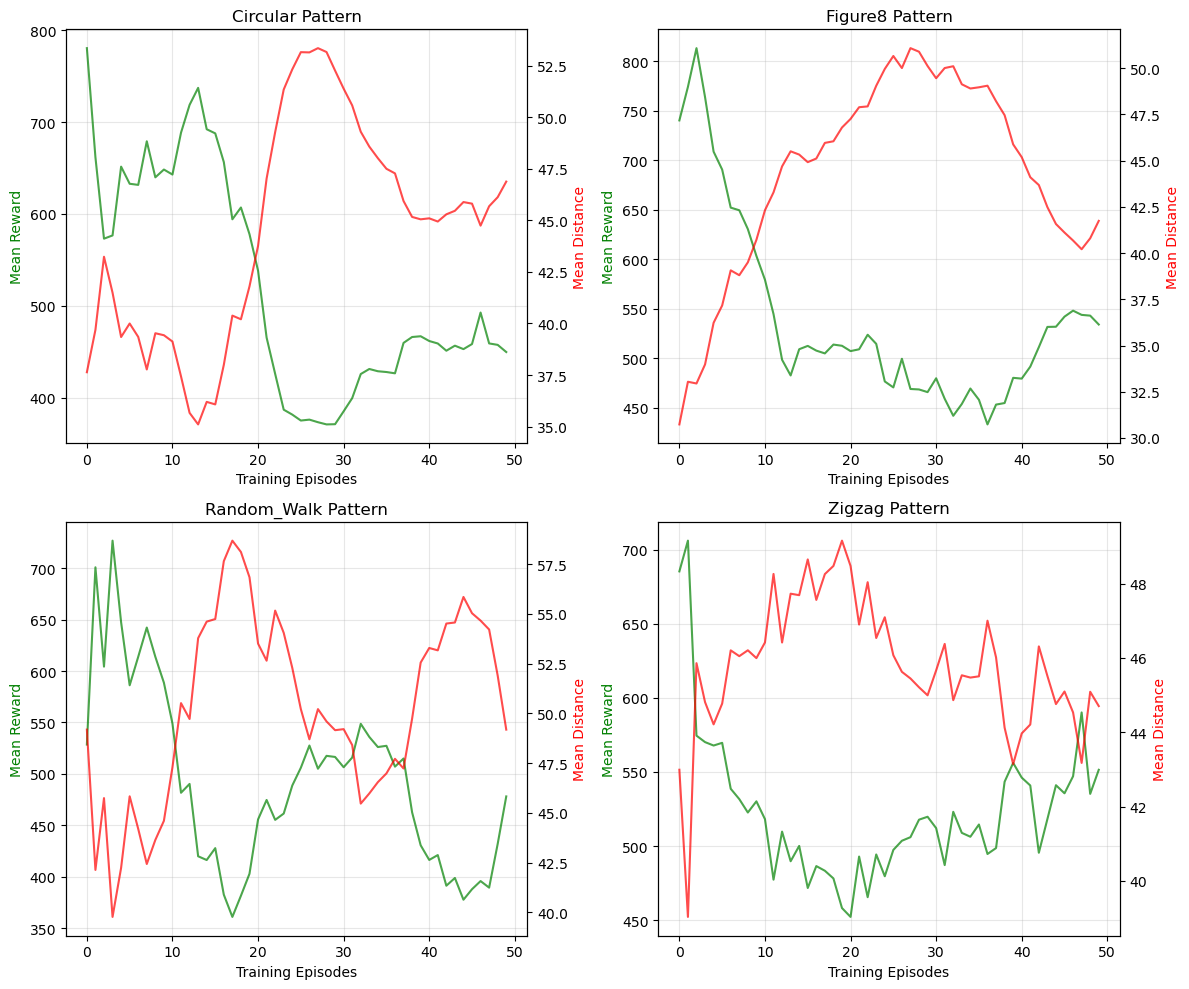

In [8]:
# Compare learning performance across different patterns
print("Comparing learning performance across movement patterns...")
print("This may take a few minutes...")

compare_movement_patterns()

## 7. Save and Load Models

Save your trained models for later use.

In [ ]:
# Save the trained model
if 'learner' in locals():
    learner.load_best()
    model_path = 'my_dot_follow_model.pt'
    learner.save_model(model_path)
    print(f"Model saved to {model_path}")
    
    # Demonstrate loading
    new_learner = DotFollowLearner('circular')
    new_learner.load_model(model_path)
    print("Model loaded successfully!")
    
    # Test loaded model
    env = DotFollowEnv('circular')
    obs = env.reset()
    
    total_reward = 0
    for _ in range(50):
        action = new_learner.ac.act(torch.as_tensor(obs, dtype=torch.float32))
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    
    print(f"Loaded model performance over 50 steps: {total_reward:.2f}")
else:
    print("No trained model to save. Please run training first.")

## 8. Curriculum Learning Experiment

Train the fish on progressively more difficult movement patterns.

Starting curriculum learning...

Phase 1: Training on circular pattern
Changed movement pattern to: circular
  Episode 0: Reward=623.88
  Episode 10: Reward=495.98
  Episode 20: Reward=496.20

Phase 2: Training on figure8 pattern
Changed movement pattern to: figure8
  Episode 0: Reward=447.44
  Episode 10: Reward=449.26
  Episode 20: Reward=444.41

Phase 3: Training on zigzag pattern
Changed movement pattern to: zigzag
  Episode 0: Reward=464.35
  Episode 10: Reward=470.45
  Episode 20: Reward=482.79

Phase 4: Training on random_walk pattern
Changed movement pattern to: random_walk
  Episode 0: Reward=489.72
  Episode 10: Reward=492.85
  Episode 20: Reward=489.21


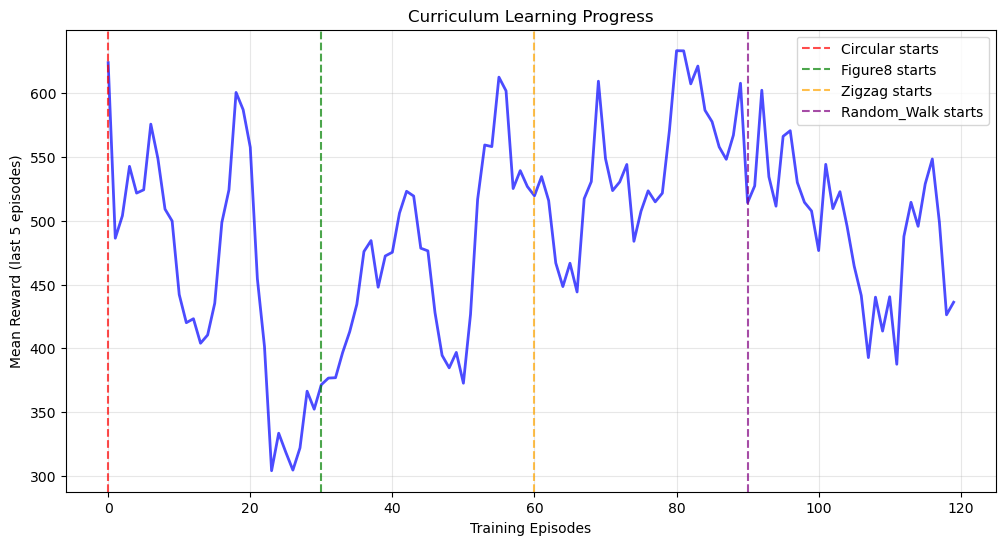


Curriculum learning completed!
Notice how the fish adapts to increasingly complex movement patterns.


In [9]:
# Curriculum learning: start easy, get harder
curriculum = ['circular', 'figure8', 'zigzag', 'random_walk']
curriculum_learner = DotFollowLearner('circular')

print("Starting curriculum learning...")
all_rewards = []
pattern_changes = []

episode_count = 0
for pattern_idx, pattern in enumerate(curriculum):
    print(f"\nPhase {pattern_idx + 1}: Training on {pattern} pattern")
    curriculum_learner.change_movement_pattern(pattern)
    pattern_changes.append(episode_count)
    
    # Train for 30 episodes on this pattern
    for episode in range(30):
        curriculum_learner.train_step()
        episode_count += 1
        
        if curriculum_learner.ep_returns:
            all_rewards.append(np.mean(list(curriculum_learner.ep_returns)[-5:]))
        
        if episode % 10 == 0:
            metrics = curriculum_learner.get_performance_metrics()
            if metrics:
                print(f"  Episode {episode}: Reward={metrics['mean_reward']:.2f}")

# Plot curriculum learning progress
plt.figure(figsize=(12, 6))
plt.plot(all_rewards, 'b-', linewidth=2, alpha=0.7)

# Add vertical lines for pattern changes
colors = ['red', 'green', 'orange', 'purple']
for i, (change_point, pattern) in enumerate(zip(pattern_changes, curriculum)):
    plt.axvline(x=change_point, color=colors[i], linestyle='--', alpha=0.7, 
                label=f'{pattern.title()} starts')

plt.title('Curriculum Learning Progress')
plt.xlabel('Training Episodes')
plt.ylabel('Mean Reward (last 5 episodes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nCurriculum learning completed!")
print("Notice how the fish adapts to increasingly complex movement patterns.")

## Summary

This notebook demonstrated:

1. **Multiple Movement Patterns**: The target can move in circular, figure-8, random walk, zigzag, and spiral patterns
2. **Enhanced Observation Space**: The fish observes both its own state and the target's position
3. **Reward Shaping**: Rewards encourage close following of the moving target
4. **Interactive Training**: Real-time visualization with the ability to change patterns during training
5. **Performance Testing**: Evaluation across different movement patterns
6. **Curriculum Learning**: Progressive training from simple to complex patterns

The dot-follow environment provides a more dynamic and challenging learning scenario compared to the static center-seeking task, requiring the fish to continuously adapt its behavior to track a moving target.

### Next Steps
- Experiment with different reward functions
- Try other RL algorithms (PPO, SAC, TD3)
- Add multiple fish following the same target
- Create custom movement patterns
- Implement transfer learning between patterns